In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/cristoshie/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### Web Scraping

Faz a coleta de dados em sites específicos, gerando importante insights ao negócio.
Pode ter benefícios, como economia de tempo e esforço, coleta feita de fontes precisas, entre outros. No entanto, deve se ter cuidado com os dados coletados e o seu uso. Por isso, foi aprovada a LGPD.

1. LGPD (Lei Geral de Proteção de Dados)

Tem como função padronizar regulamentos e práticas referentes a como os dados brasileiros são coletados, tratados, armazenados e protegidos e estabelece punições pelo descumprimento em casos de irregularidades, como vazamentos.

In [30]:
link = 'https://news.google.com/search?for=americanas&hl=pt-BR&gl=BR&ceid=BR%3Apt-419'
page = requests.get(link)
page

<Response [200]>

- Beautiful soup

Biblioteca python que facilita a extração de dados nos documentos html e xml.

In [31]:
sample = BeautifulSoup(page.text, 'html.parser')

In [32]:
# escrito dentro da tag title
sample.title.string

'Google Notícias - Pesquisar'

In [33]:
# qual a tag desta classe
sample.find(class_='pGxpHc').name

'div'

In [34]:
sample.find(class_='cp7Yvc').string

AttributeError: 'NoneType' object has no attribute 'string'

In [8]:
# quantidade de tag div nos textos
len(sample.find_all('h3'))

106

- Web scraping na prática

In [35]:
def search(item):
    url = f'https://news.google.com/search?for={item}&hl=pt-BR&gl=BR&ceid=BR%3Apt-419'
    found = requests.get(url)
    
    text_html = found.text
    
    scraper = BeautifulSoup(text_html, 'html.parser')
    
    return scraper

In [75]:
df = search('stf')

elements = df.find_all('h3')

In [76]:
# busca os textos sobre o assunto
news = [script.get_text() for script in elements]
print(len(news))

5


In [77]:
print("Primeiras 20 notícias: ")
print("----------------------")
for n, loop in enumerate(news[0:5]):
    print(loop)

Primeiras 20 notícias: 
----------------------
Jair Bolsonaro enfrenta julgamento no Supremo Tribunal Federal
Notícias sobre PEC • STF
Notícias sobre Robinho • STF
Notícias sobre servidores • STF
Gilmar Mendes exclui trabalho por aplicativo da pejotização


In [78]:
mingle = ''

for loop in news:
    breakg = loop.split()
    
    for word in breakg:
        mingle = mingle + ' ' + word

In [79]:
mingle

' Jair Bolsonaro enfrenta julgamento no Supremo Tribunal Federal Notícias sobre PEC • STF Notícias sobre Robinho • STF Notícias sobre servidores • STF Gilmar Mendes exclui trabalho por aplicativo da pejotização'

In [80]:
Stopwords = nltk.corpus.stopwords.words('portuguese')

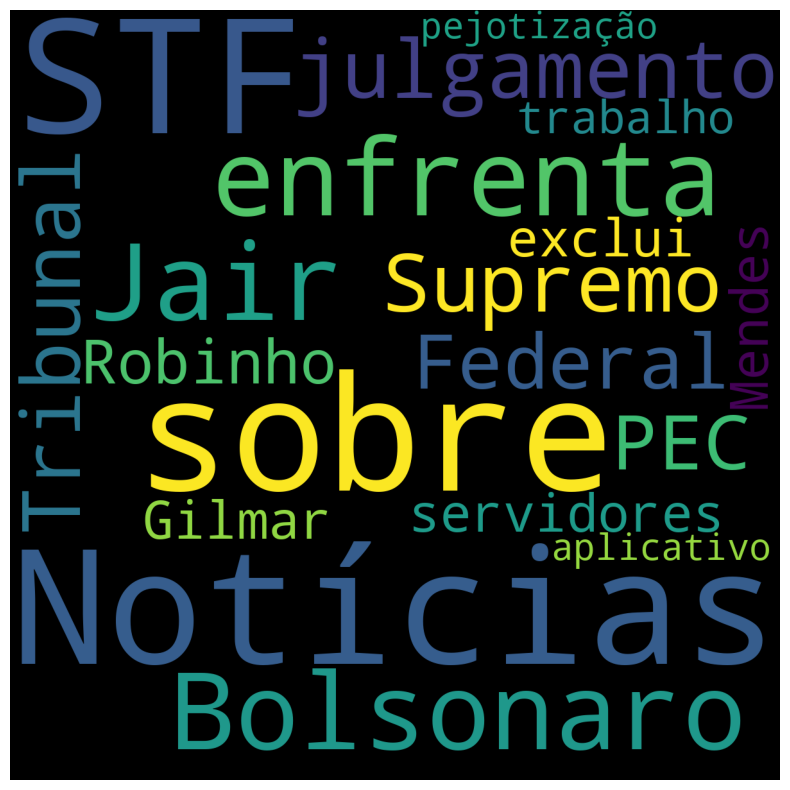

In [81]:
cloud = WordCloud(
    width = 1200,
    height = 1200,
    max_words = 250,
    background_color='black',
    stopwords = Stopwords
).generate(mingle)

figurine, size = plt.subplots(figsize=(12, 10))
#plt.title('Nuvem de palavras')
size.imshow(cloud)
size.set_axis_off()

plt.savefig('nuvem_palavras.png', bbox_inches = 'tight')